# Phase diagram tutorial

Sometimes, for study or for some class to be more didactic, the use of phase diagrams helps the student's understanding or even takes a doubt out of some research. However, it is not a simple task to make a good phase diagram by hand. This program is intended to help the study of the physical phases of chemical substances for chemistry, engineering, mineralogy or any area of science that uses this type of graph.
The program is simple to use, just clone this repository, import the function and enter the values that will be requested, and you will have your phase diagram.

## Example 01 - Phase diagram of water

name of substance: water
Triple point temperature of substance \ Kelvin: 273.16
triple point pressure of substance \ Pascal: 611.73
Critical point temperature of substance \ Kelvin: 647.3
Critical point pressure of substance \ Pascal: 22050000
Melting enthalpy of substance \ Joule/mol: 5980
Melting volume of substance \ cm3/mol: 1.634
Sublimation enthalpy of substance \ Joule/mol: 50900
Boiling enthalpy of substance \ Joule/mol: 44900
Antoine equation parameters - A of the triple point: 5.40221
Antoine equation parameter -  A of the critical point: 5.08354
Antoine equation parameters - B of the triple point: 1836.675
Antoine equation parameter -  B of the critical point: 1663.125
Antoine equation parameters - C of the triple point: -31.373
Antoine equation parameter -  C of the critical point: -45.622


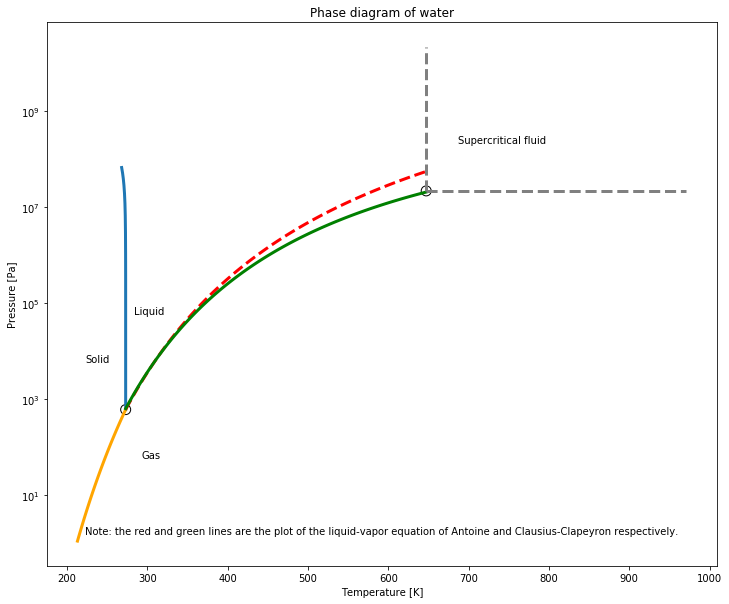

In [1]:
import phase_diagram

## Example 02 - Phase diagram of carbon dioxide

name of substance: carbon dioxide
Triple point temperature of substance \ Kelvin: 216.58
triple point pressure of substance \ Pascal: 518500
Critical point temperature of substance \ Kelvin: 304.13
Critical point pressure of substance \ Pascal: 7375000
Melting enthalpy of substance \ Joule/mol: 9020
Melting volume of substance \ cm3/mol: 1.63
Sublimation enthalpy of substance \ Joule/mol: 25200
Boiling enthalpy of substance \ Joule/mol: 15800
Antoine equation parameters - A of the triple point: 6.81228
Antoine equation parameter -  A of the critical point: 6.4035432
Antoine equation parameters - B of the triple point: 1301.679
Antoine equation parameter -  B of the critical point: 1178.019495
Antoine equation parameters - C of the triple point: -3.494
Antoine equation parameter -  C of the critical point: -5.4157


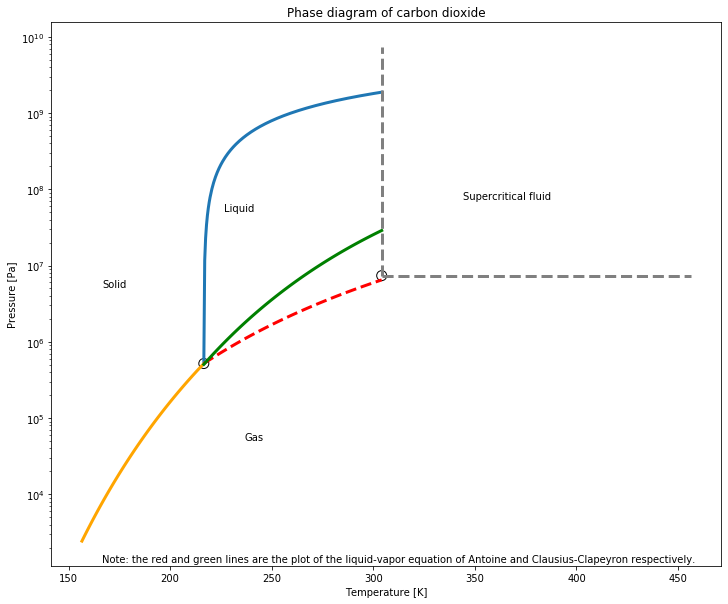

In [1]:
from phase_diagram import phase_diagram